# MOwNiT
## Laboratorium 2
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji 0.14 : https://juliadata.github.io/DataFrames.jl/stable/index.html





In [3]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
│ Row │ MojaKolumna │ x2      │ Col3 │
│     │ Int64       │ Float64 │ Bool │
├─────┼─────────────┼─────────┼──────┤
│ 1   │ 1           │ 4.0     │ 1    │
│ 2   │ 2           │ 3.14159 │ 0    │
│ 3   │ 3           │ 1.41421 │ 1    │
│ 4   │ 4           │ 42.0    │ 0    │

In [4]:
typeof(df1[!,2])

Array{Float64,1}

In [5]:
typeof(df1.Col3)

Array{Bool,1}

In [6]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1
7,7,3.14159,1
8,8,1.41421,0
9,9,3.0,1


In [7]:
# ilosc wierszy
size(df2, 1) 

10

In [8]:
#ilosc kolumn
size(df2, 2) 

3

In [9]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [34]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [32]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
│ Row │ MojaKolumna │ Col2    │ Col3 │
│     │ Int64       │ Float64 │ Bool │
├─────┼─────────────┼─────────┼──────┤
│ 3   │ 3           │ 1.41421 │ 0    │

In [12]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,1
2,3,1.41421,0


In [13]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.141592653589793 
 1.4142135623730951

In [14]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,1
2,1.41421,0


In [15]:
# pierwsze sześć wierszy
DataFrames.first(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1


In [16]:
# ostatnie sześć wierszy
DataFrames.last(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
10,10,4.0,0


In [17]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [18]:
# typy kolumn
eltype.(eachcol(df2))

3-element Array{DataType,1}:
 Int64  
 Float64
 Bool   

In [19]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,MojaKolumna,5.5,1,5.5,10,,,Int64
2,Col2,2.71116,1.41421,3.0,4.0,,,Float64
3,Col3,0.6,0,1.0,1,,,Bool


In [20]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [21]:
var(df2.Col2)

0.9150284373648316

In [ ]:
using CSV
input="result.csv"
mydata=CSV.read(input, delim=",")

In [23]:
typeof(mydata)

UndefVarError: UndefVarError: mydata not defined

In [24]:
size(mydata)

UndefVarError: UndefVarError: mydata not defined

In [25]:
# grupowanie wierszy (tutaj po jakości (quality))
# ostatni argument to funkcja albo wyrażenie 
#https://juliadata.github.io/DataFrames.jl/stable/man/split_apply_combine.html
# przyklad: zliczanie ilosci win pogrupowanych po jakości
wine_grouped=by(mydata, :quality, df->size(df,1))

UndefVarError: UndefVarError: mydata not defined

In [26]:
#zaawansowane dzialanie na podgrupach
df2=by(mydata, [:quality, :alcohol]) do mySubGroup
          DataFrame(size = size(mySubGroup,1))
        end
sort(df2, [:quality, :alcohol])

UndefVarError: UndefVarError: mydata not defined

In [27]:
# zapis do pliku
# https://juliadata.github.io/DataFrames.jl/stable/man/getting_started.html#Importing-and-Exporting-Data-(I/O)-1
CSV.write("dataframe1.csv", mydata)

UndefVarError: UndefVarError: CSV not defined


### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest dodatkowy pakiet do pakietu Plots 

W przypadku własnej instalacji:

```julia
Pkg.add("StatPlots")
```
https://github.com/JuliaPlots/StatPlots.jl



In [28]:
using DataFrames
df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10), d=rand(10), e=map(x->x%2,(1:10)))


,a,b,c,d,e
,Int64,Float64,Float64,Float64,Int64
1,1,3.7087,7.24175,0.181075,1
2,2,8.70992,3.05967,0.910791,0
3,3,6.24731,5.91715,0.187911,1
4,4,6.74638,6.85403,0.271462,0
5,5,1.66375,8.88722,0.310591,1
6,6,1.92381,5.13616,0.976945,0
7,7,9.57818,8.26492,0.160031,1
8,8,3.21208,9.42301,0.902342,0
9,9,5.77384,1.32177,0.727795,1


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


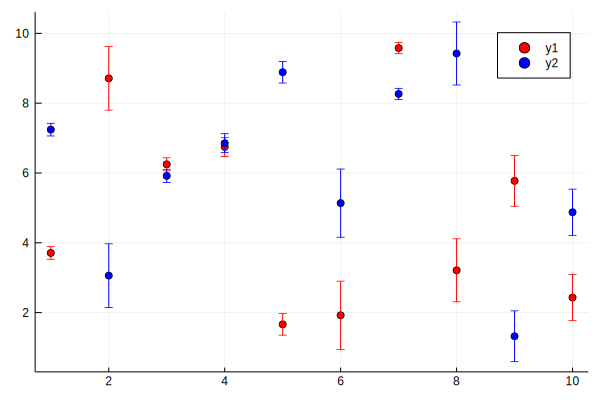

In [29]:
# zamiast makra @df z pakietu StatPlots mozna odwolywac sie bezposrednio do kolumn (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})
using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


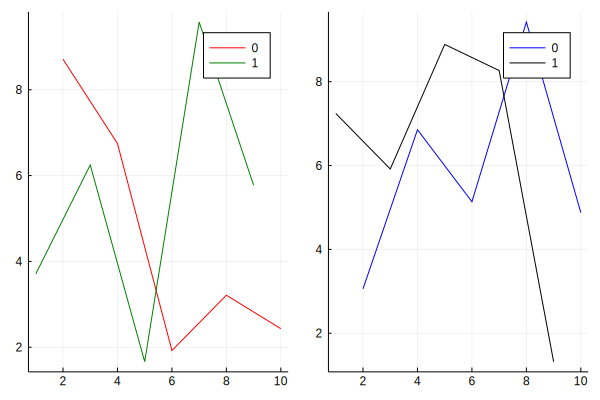

In [30]:
plot(df.a, [df.b, df.c], group=df.e, colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.